# Importing Libraries And DataSet

In [6]:
!pip install scikit-learn --upgrade

In [7]:
import sklearn

sklearn.__version__

'1.5.0'

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [10]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Pre-Processing And Visualisations

## Data Cleaning

In [12]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
df=df.fillna(df['bmi'].mean())

In [14]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [15]:
np.unique(df["work_type"])

array(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'],
      dtype=object)

In [16]:
df=df.iloc[:,1:]
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


## Plots and visualisation

### Count Plots

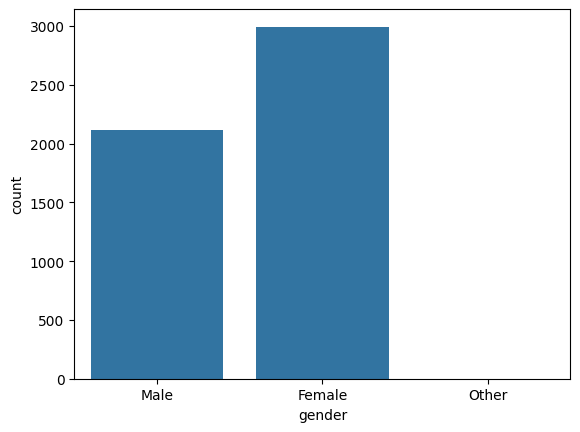

In [17]:
sns.countplot(x = 'gender',data=df)
plt.show()

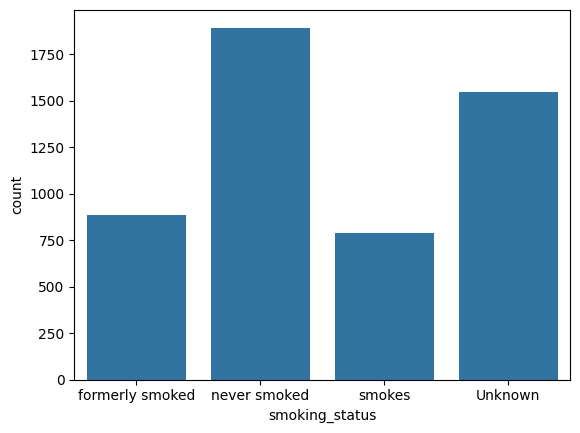

In [18]:
sns.countplot(x ='smoking_status', data = df)
plt.show()

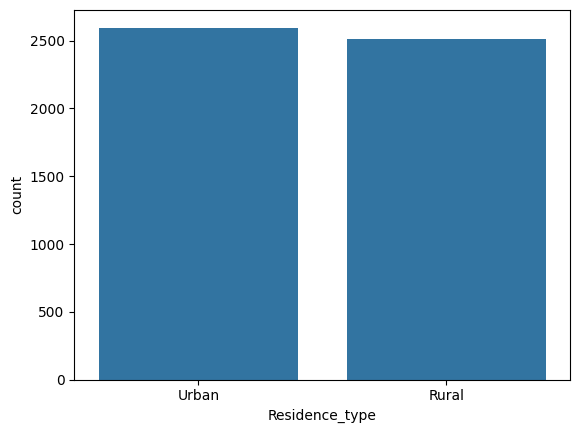

In [19]:
sns.countplot(x ='Residence_type', data = df)
plt.show()

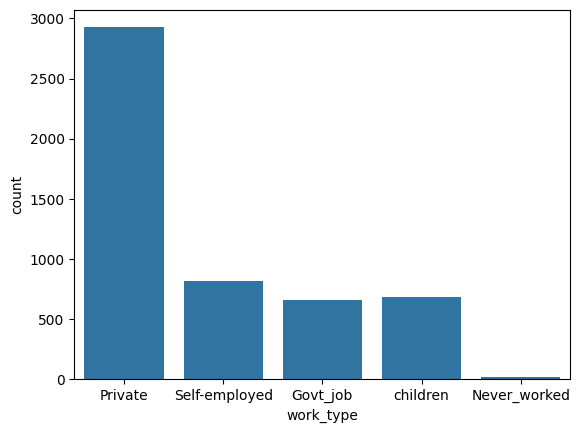

In [20]:
sns.countplot(x ='work_type', data = df)
plt.show()

### Distribution of Categorial Featues

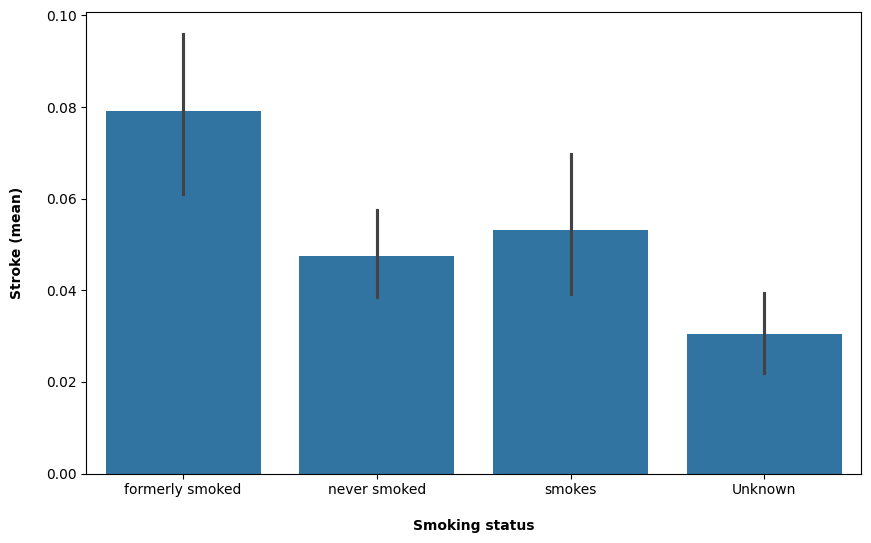

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x="smoking_status", y="stroke", data=df)
plt.xlabel("\nSmoking status", fontweight="bold")
plt.ylabel("Stroke (mean)\n", fontweight="bold")
plt.show()

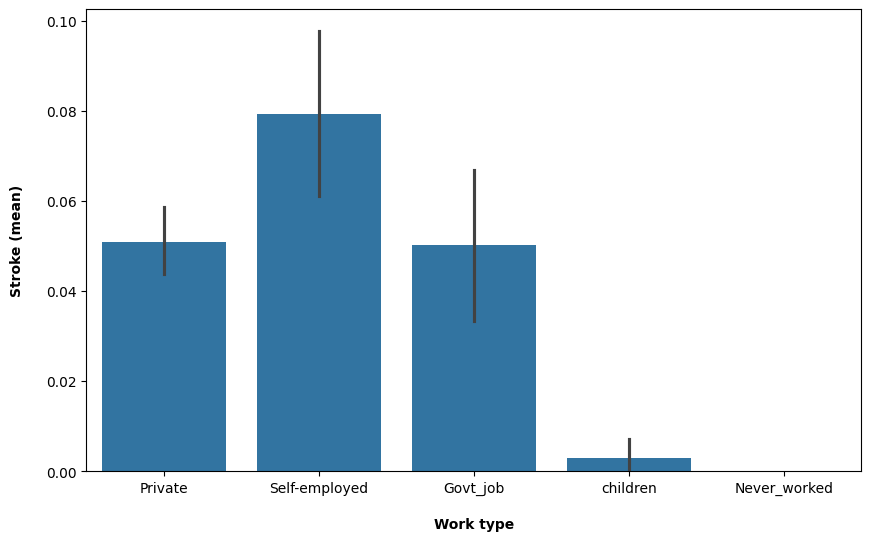

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x="work_type", y="stroke", data=df)
plt.xlabel("\nWork type", fontweight="bold")
plt.ylabel("Stroke (mean)\n", fontweight="bold")
plt.show()

### Distribution of Categorical Featuers With Stroke  

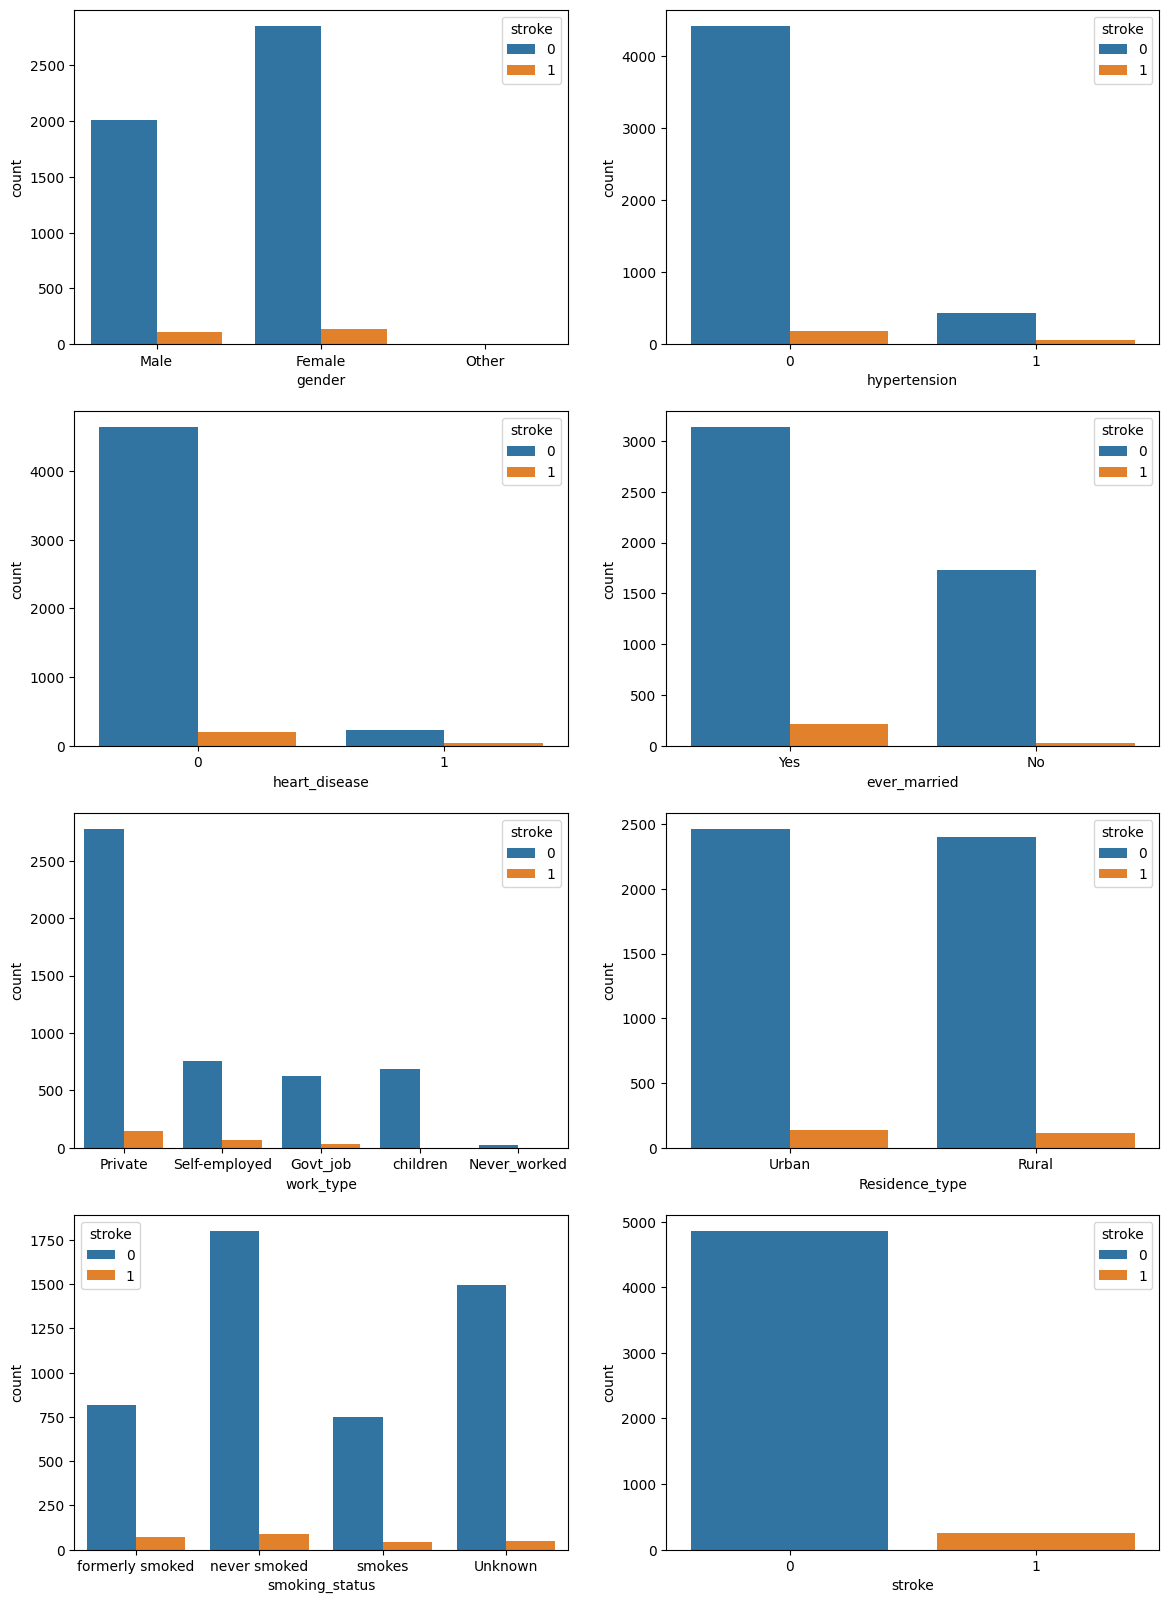

In [23]:
some_attri=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status', 'stroke']
fig, axis = plt.subplots(4, 2, figsize=(14,20))
axis = axis.flatten()
for i, col_name in enumerate(some_attri):
    sns.countplot(x=col_name, data=df, ax=axis[i], hue =df['stroke'])
plt.show()

### Denstity Distribution of Continous Features With Stroke

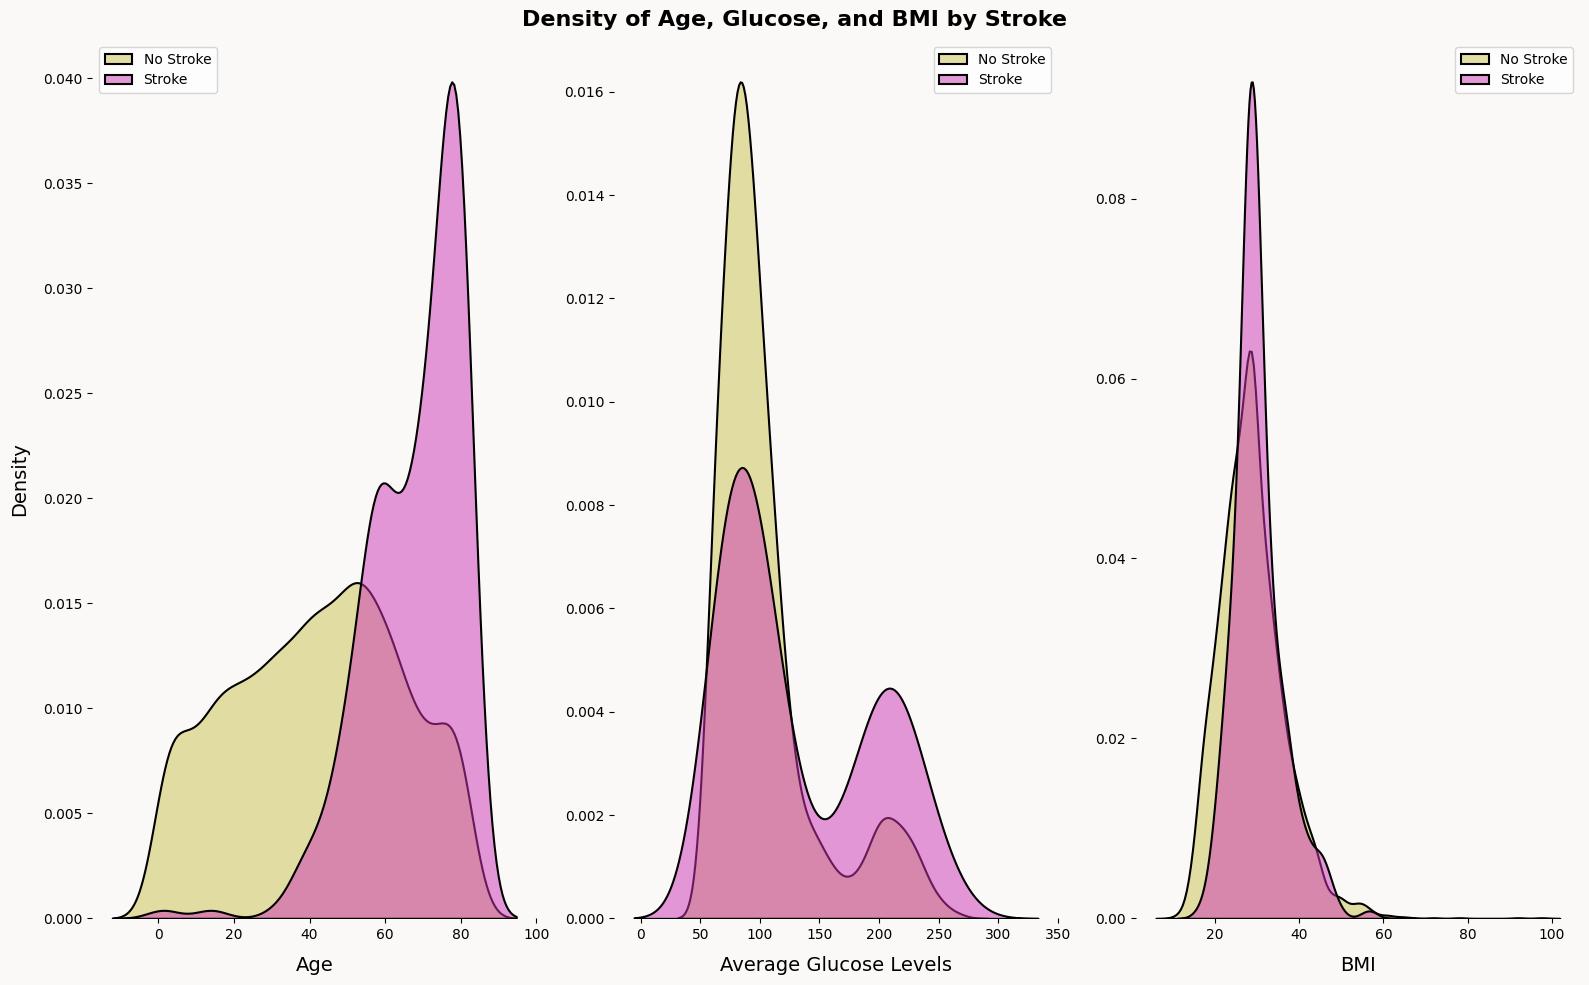

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16,10))
fig.patch.set_facecolor('#faf9f7')

for i in (ax1, ax2, ax3):
    i.set_facecolor('#faf9f7')

sns.kdeplot(
    df['age'][df['stroke'] == 0],
    ax = ax1,
    color = "#c8c14f",
    fill = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)
sns.kdeplot(
    df['age'][df['stroke'] == 1],
    ax = ax1,
    color = "#cd34b5",
    fill = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)
ax1.legend(['No Stroke', 'Stroke'], loc = 'upper left')
ax1.set_xlabel('Age', fontsize = 14, labelpad = 10)
ax1.set_ylabel('Density', fontsize = 14, labelpad = 10)

sns.kdeplot(
    df['avg_glucose_level'][df['stroke'] == 0],
    ax = ax2,
    color = "#c8c14f",
    fill = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
    )

sns.kdeplot(
    df['avg_glucose_level'][df['stroke'] == 1],
    ax = ax2,
    color = "#cd34b5",
    fill = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)
ax2.legend(['No Stroke', 'Stroke'])
ax2.set_xlabel('Average Glucose Levels', fontsize = 14, labelpad = 10)
ax2.set_ylabel('')

sns.kdeplot(
    df['bmi'][df['stroke'] == 0],
    ax = ax3,
    color = "#c8c14f",
    fill = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)

sns.kdeplot(
    df['bmi'][df['stroke'] == 1],
    ax = ax3,
    color = "#cd34b5",
    fill = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)

ax3.legend(['No Stroke', 'Stroke'])
ax3.set_xlabel('BMI', fontsize = 14, labelpad = 10)
ax3.set_ylabel('')

plt.suptitle('Density of Age, Glucose, and BMI by Stroke', fontsize = 16, fontweight = 'bold')
for i in (ax1, ax2, ax3):
    for j in ['top', 'left', 'bottom', 'right']:
        i.spines[j].set_visible(False)

fig.tight_layout()

### Distribution of Stroke

Text(0.5, 1.0, 'Percentage of Strokes')

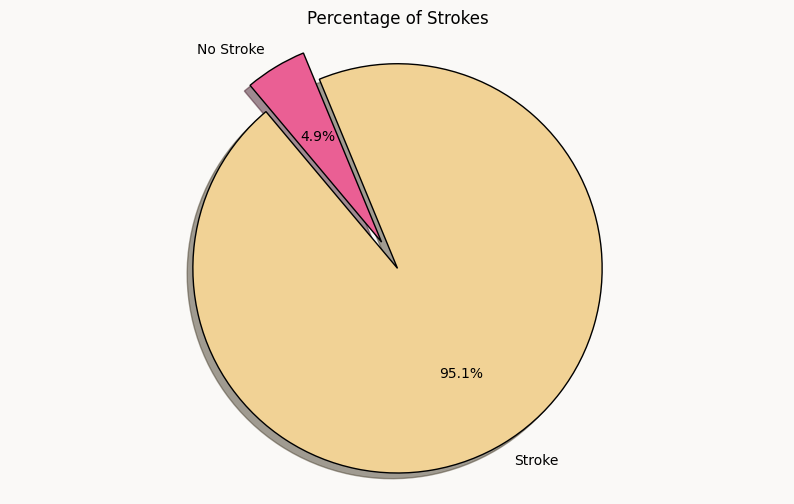

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
fig.patch.set_facecolor('#faf9f7')
ax.set_facecolor('#faf9f7')

labels = ['Stroke', 'No Stroke']
colors = ["#f1d295", "#ea5f94"]
sizes = df['stroke'].value_counts()

plt.pie(sizes, explode = [0, 0.15], labels = labels, colors = colors,
           autopct = '%1.1f%%', shadow = True, startangle = 130,
           wedgeprops = {'ec': 'black'}, textprops = {'fontweight': 'medium'}
)
plt.axis('equal')
plt.title('Percentage of Strokes')

## Encoding of Categorical Features

In [26]:
labelencoder=LabelEncoder()
for i in df.columns:
  if df.dtypes[i]!=int and df.dtypes[i]!=float:
    df[i]=labelencoder.fit_transform(df[i])

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


## Correlation Between Features

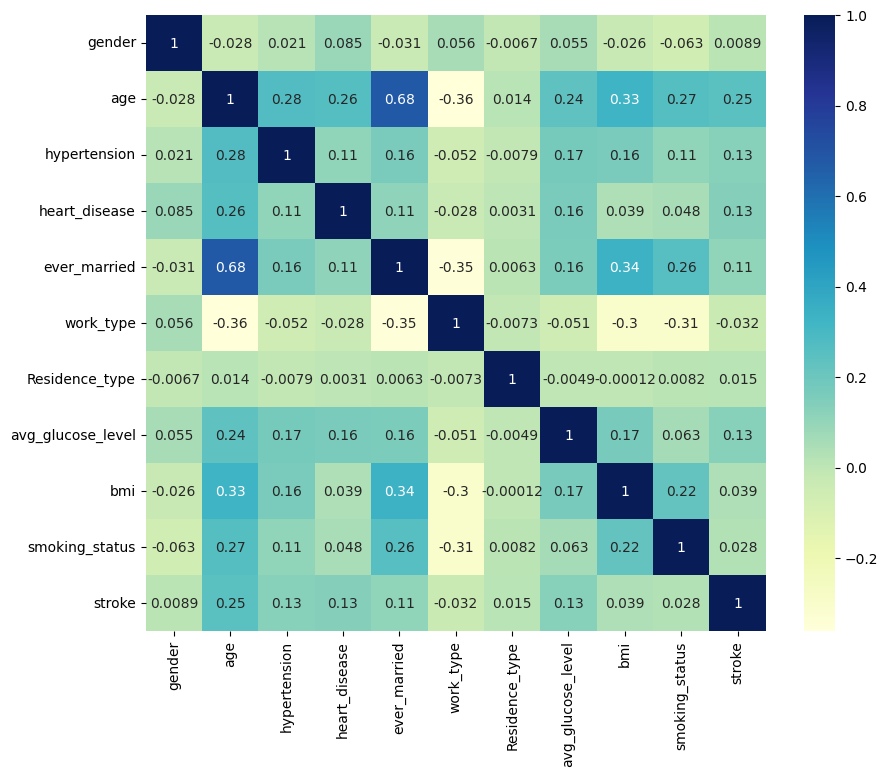

In [27]:
plt.subplots(figsize=(10,8))
sns.heatmap(data=df.corr(),annot=True, cmap = "YlGnBu")
plt.show()

## OverSampling

In [28]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

In [29]:
!pip install imbalanced-learn --upgrade
# from imblearn.over_sampling import RandomOverSampler

In [30]:
import imblearn
imblearn.__version__

'0.12.3'

In [31]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler()
X_os,Y_os = oversampler.fit_resample(X,Y)

In [32]:
len(X_os)

9722

In [33]:
acc=[]
f1=[]
precision=[]
recall=[]
roc_auc=[]

## Train Test Split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(X_os,Y_os,test_size=0.3,stratify=Y_os)

# Models

## Decision Tree Classifier

In [35]:
model1 = DecisionTreeClassifier()

In [36]:
model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)

acc1 = accuracy_score(y_test, y_pred1)
f1_1 = f1_score(y_test, y_pred1)
pre1 = precision_score(y_test, y_pred1)
rec1 = recall_score(y_test, y_pred1)
roc1 = roc_auc_score(y_test, y_pred1)

print("accuracy_score of Model-1 =", acc1)
print("f1_score of Model-1 =", f1_1)
print("precision_score of Model-1 =", pre1)
print("recall_score of Model-1 =", rec1)
print("roc_auc score of Model-1 =", roc1)

accuracy_score of Model-1 = 0.9718889269797737
f1_score of Model-1 = 0.9726666666666667
precision_score of Model-1 = 0.9467878001297858
recall_score of Model-1 = 1.0
roc_auc score of Model-1 = 0.9718792866941015


## Random Forest Classifier

In [37]:
model2 = RandomForestClassifier(random_state=42)

In [38]:
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)

acc2 = accuracy_score(y_test, y_pred2)
f1_2 = f1_score(y_test, y_pred2)
pre2 = precision_score(y_test, y_pred2)
rec2 = recall_score(y_test, y_pred2)
roc2 = roc_auc_score(y_test, y_pred2)

print("accuracy_score of Model-2 =", acc2)
print("f1_score of Model-2 =", f1_2)
print("precision_score of Model-2 =", pre2)
print("recall_score of Model-2 =", rec2)
print("roc_auc score of Model-2 =", roc2)

accuracy_score of Model-2 = 0.9904010970174837
f1_score of Model-2 = 0.9904955872369314
precision_score of Model-2 = 0.9811701412239409
recall_score of Model-2 = 1.0
roc_auc score of Model-2 = 0.9903978052126201


## XGB Classifier

In [39]:
model3 = XGBClassifier()

In [40]:
model3.fit(x_train,y_train)
y_pred3 = model3.predict(x_test)

acc3 = accuracy_score(y_test, y_pred3)
f1_3 = f1_score(y_test, y_pred3)
pre3 = precision_score(y_test, y_pred3)
rec3 = recall_score(y_test, y_pred3)
roc3 = roc_auc_score(y_test, y_pred3)

print("accuracy_score of Model-3=", acc3)
print("f1_score of Model-3=", f1_3)
print("precision_score of Model-3=", pre3)
print("recall_score of Model-3=", rec3)
print("roc_auc score of Model-3=", roc3)

accuracy_score of Model-3= 0.9725745629070963
f1_score of Model-3= 0.9733155436957972
precision_score of Model-3= 0.9480181936322287
recall_score of Model-3= 1.0
roc_auc score of Model-3= 0.9725651577503429


## LGBM Classifier

In [41]:
model4 = LGBMClassifier()

In [42]:
model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)

acc4 = accuracy_score(y_test, y_pred4)
f1_4 = f1_score(y_test, y_pred4)
pre4 = precision_score(y_test, y_pred4)
rec4 = recall_score(y_test, y_pred4)
roc4 = roc_auc_score(y_test, y_pred4)

print("accuracy_score of Model-4=", acc4)
print("f1_score of Model-4=", f1_4)
print("precision_score of Model-4=", pre4)
print("recall_score of Model-4=", rec4)
print("roc_auc score of Model-4=", roc4)

[LightGBM] [Info] Number of positive: 3402, number of negative: 3403
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 628
[LightGBM] [Info] Number of data points in the train set: 6805, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499927 -> initscore=-0.000294
[LightGBM] [Info] Start training from score -0.000294
accuracy_score of Model-4= 0.9561193006513541
f1_score of Model-4= 0.9579776756401839
precision_score of Model-4= 0.9193446754883428
recall_score of Model-4= 1.0
roc_auc score of Model-4= 0.9561042524005486


## Logistic Regression

In [43]:
model5 = LogisticRegression()

In [44]:
model5.fit(x_train,y_train)
y_pred5 = model5.predict(x_test)

acc5 = accuracy_score(y_test, y_pred5)
f1_5 = f1_score(y_test, y_pred5)
pre5 = precision_score(y_test, y_pred5)
rec5 = recall_score(y_test, y_pred5)
roc5 = roc_auc_score(y_test, y_pred5)

print("accuracy_score of Model-5=", acc5)
print("f1_score of Model-5=", f1_5)
print("precision_score of Model-5=", pre5)
print("recall_score of Model-5=", rec5)
print("roc_auc score of Model-5=", roc5)

accuracy_score of Model-5= 0.7672266026739801
f1_score of Model-5= 0.771149309066397
precision_score of Model-5= 0.7586206896551724
recall_score of Model-5= 0.7840986977381769
roc_auc score of Model-5= 0.7672208166331488


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## SVC Classifier

In [45]:
model6 = SVC(kernel = 'rbf')

In [46]:
model6.fit(x_train,y_train)
y_pred6 = model6.predict(x_test)

acc6 = accuracy_score(y_test, y_pred6)
f1_6 = f1_score(y_test, y_pred6)
pre6 = precision_score(y_test, y_pred6)
rec6 = recall_score(y_test, y_pred6)
roc6 = roc_auc_score(y_test, y_pred6)

print("accuracy_score of Model-6=", acc6)
print("f1_score of Model-6=", f1_6)
print("precision_score of Model-6=", pre6)
print("recall_score of Model-6=", rec6)
print("roc_auc score of Model-6=", roc6)

accuracy_score of Model-6= 0.7668837847103188
f1_score of Model-6= 0.7764628533859304
precision_score of Model-6= 0.7460518003790272
recall_score of Model-6= 0.8094585332419465
roc_auc score of Model-6= 0.7668691843164465


# Hyper-Parameter Tuning(Using GridSearchCV)

## Decision Tree Classifier(With GridSearchCV)

In [47]:
model7 = DecisionTreeClassifier()

params = {"max_depth" : [3,5,7,9,11,13,15,17,19,21,23,25,27,29],
          "min_samples_leaf":[1,3,4,5,6,7,8,9],
          "max_leaf_nodes":[None,10,20,30,40,50,60,70] }

clf = GridSearchCV(estimator=model7,
                   param_grid=params,
                   scoring='accuracy',
                   verbose=2, cv = 2)

clf.fit(x_train, y_train)

print("Best parameters:", clf.best_params_)
print("Highest Accuracy: ", (-1)*(-clf.best_score_))

Fitting 2 folds for each of 896 candidates, totalling 1792 fits
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=1; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=1; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=4; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=4; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=5; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=5; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=6; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=6; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=7; total time=   0.0s
[CV] END max_depth=3, max_leaf_nod

In [48]:
model7 = DecisionTreeClassifier(max_depth = 27, max_leaf_nodes = None, min_samples_leaf = 1)

In [49]:
model7.fit(x_train,y_train)
y_pred7 = model7.predict(x_test)

acc7 = accuracy_score(y_test, y_pred7)
f1_7 = f1_score(y_test, y_pred7)
pre7 = precision_score(y_test, y_pred7)
rec7 = recall_score(y_test, y_pred7)
roc7 = roc_auc_score(y_test, y_pred7)

print("accuracy_score of Model-7 =", acc7)
print("f1_score of Model-7 =", f1_7)
print("precision_score of Model-7 =", pre7)
print("recall_score of Model-7 =", rec7)
print("roc_auc score of Model-7 =", roc7)

accuracy_score of Model-7 = 0.9688035653068221
f1_score of Model-7 = 0.969757394483217
precision_score of Model-7 = 0.9412903225806452
recall_score of Model-7 = 1.0
roc_auc score of Model-7 = 0.9687928669410151


## Random Forest Classifier(With GridSearchCV)

In [50]:
model8 = RandomForestClassifier()

params = {'max_depth': [5,9,11,13,15,17,19,21,23,25],
          'n_estimators': [10,30,50,70,90,100,200,300],
          'max_leaf_nodes': [10,30,50,70,None]}

clf = GridSearchCV(estimator=model8,
                   param_grid=params,
                   scoring='accuracy',
                   verbose=2, cv = 2)

clf.fit(x_train, y_train)

print("Best parameters:", clf.best_params_)
print("Highest Accuracy: ", -1*(-clf.best_score_))

Fitting 2 folds for each of 400 candidates, totalling 800 fits
[CV] END ....max_depth=5, max_leaf_nodes=10, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=5, max_leaf_nodes=10, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=5, max_leaf_nodes=10, n_estimators=30; total time=   0.1s
[CV] END ....max_depth=5, max_leaf_nodes=10, n_estimators=30; total time=   0.1s
[CV] END ....max_depth=5, max_leaf_nodes=10, n_estimators=50; total time=   0.1s
[CV] END ....max_depth=5, max_leaf_nodes=10, n_estimators=50; total time=   0.2s
[CV] END ....max_depth=5, max_leaf_nodes=10, n_estimators=70; total time=   0.2s
[CV] END ....max_depth=5, max_leaf_nodes=10, n_estimators=70; total time=   0.2s
[CV] END ....max_depth=5, max_leaf_nodes=10, n_estimators=90; total time=   0.3s
[CV] END ....max_depth=5, max_leaf_nodes=10, n_estimators=90; total time=   0.3s
[CV] END ...max_depth=5, max_leaf_nodes=10, n_estimators=100; total time=   0.3s
[CV] END ...max_depth=5, max_leaf_nodes=10, n_

In [51]:
model8 = RandomForestClassifier(max_depth = 25,  max_leaf_nodes = None, n_estimators = 50)

In [52]:
model8.fit(x_train,y_train)
y_pred8 = model8.predict(x_test)

acc8 = accuracy_score(y_test, y_pred8)
f1_8 = f1_score(y_test, y_pred8)
pre8 = precision_score(y_test, y_pred8)
rec8 = recall_score(y_test, y_pred8)
roc8 = roc_auc_score(y_test, y_pred8)

print("accuracy_score of Model-8 =", acc8)
print("f1_score of Model-8 =", f1_8)
print("precision_score of Model-8 =", pre8)
print("recall_score of Model-8 =", rec8)
print("roc_auc score of Model-8 =", roc8)

accuracy_score of Model-8 = 0.990743914981145
f1_score of Model-8 = 0.9908319185059423
precision_score of Model-8 = 0.9818304172274562
recall_score of Model-8 = 1.0
roc_auc score of Model-8 = 0.9907407407407408


## XGB Classifier(With GridSearchCV)

In [53]:
model9 = XGBClassifier()

params = {'max_depth': [7,9,11,13,15,17,19,21,23,25],
          'learning_rate': [0.1, 0.3, 0.5],
          'n_estimators': [30,50,70,90,100,200],
          'subsample': [0.3, 0.5, 0.7]}

clf = GridSearchCV(estimator=model9,
                   param_grid=params,
                   scoring='accuracy',
                   verbose=2, cv = 2)

clf.fit(x_train, y_train)

print("Best parameters:", clf.best_params_)
print("Highest Accuracy: ", -1*(-clf.best_score_))

Fitting 2 folds for each of 540 candidates, totalling 1080 fits
[CV] END learning_rate=0.1, max_depth=7, n_estimators=30, subsample=0.3; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=30, subsample=0.3; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=30, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=30, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=30, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=30, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.3; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.3; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END learnin

In [54]:
model9 = XGBClassifier(max_depth = 23, learning_rate = 0.3, n_estimators = 200, subsample = 0.7)

In [55]:
model9.fit(x_train,y_train)
y_pred9 = model9.predict(x_test)

acc9 = accuracy_score(y_test, y_pred9)
f1_9 = f1_score(y_test, y_pred9)
pre9 = precision_score(y_test, y_pred9)
rec9 = recall_score(y_test, y_pred9)
roc9 = roc_auc_score(y_test, y_pred9)

print("accuracy_score of Model-9 =", acc9)
print("f1_score of Model-9 =", f1_9)
print("precision_score of Model-9 =", pre9)
print("recall_score of Model-9 =", rec9)
print("roc_auc score of Model-9 =", roc9)

accuracy_score of Model-9 = 0.9780596503256771
f1_score of Model-9 = 0.9785378940308518
precision_score of Model-9 = 0.9579776756401839
recall_score of Model-9 = 1.0
roc_auc score of Model-9 = 0.9780521262002744


## LGBM Classifer(With Hyper-Parameter Tuning)

In [56]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [57]:

model10 = LGBMClassifier(verbose= -100)

params = {
          'max_depth': [5,7,9,11,13,15,17,19,21,23,25],
          'learning_rate': [0.1, 0.3, 0.5],
          'n_estimators': [10,30,50,70,90,100,150,200],
          'subsample': [0.3, 0.5, 0.7]}

clf = GridSearchCV(estimator=model10,
                   param_grid=params,
                   scoring='accuracy',
                   verbose=2,cv=2)

clf.fit(x_train, y_train)

print("Best parameters:", clf.best_params_)
print("Highest Accuracy: ", (-1)*(-clf.best_score_))

Fitting 2 folds for each of 792 candidates, totalling 1584 fits
[CV] END learning_rate=0.1, max_depth=5, n_estimators=10, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=10, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=10, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=10, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=10, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=10, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=30, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=30, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=30, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=30, subsample=0.5; total time=   0.0s
[CV] END learnin

In [58]:
model10 = LGBMClassifier(max_depth = 21, learning_rate = 0.3, n_estimators = 200, subsample = 0.3)

In [59]:
model10.fit(x_train,y_train)
y_pred10 = model10.predict(x_test)

acc10 = accuracy_score(y_test, y_pred10)
f1_10 = f1_score(y_test, y_pred10)
pre10 = precision_score(y_test, y_pred10)
rec10 = recall_score(y_test, y_pred10)
roc10 = roc_auc_score(y_test, y_pred10)

print("accuracy_score of Model-10 =", acc10)
print("f1_score of Model-10 =", f1_10)
print("precision_score of Model-10 =", pre10)
print("recall_score of Model-10 =", rec10)
print("roc_auc score of Model-10 =", roc10)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3402, number of negative: 3403
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 628
[LightGBM] [Info] Number of data points in the train set: 6805, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499927 -> initscore=-0.000294
[LightGBM] [Info] Start training from score -0.000294
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
accuracy_score of Model-10 = 0.9828591018169353
f1_score of Model-10 = 0.9831536388140162
precision_score of Model-10 = 

## Logistic Regression(With GridSearchCV)

In [60]:
model11 = LogisticRegression()

params = {'penalty' : ['l1','l2'],
          'C'       : np.logspace(-3,3,7),
          'solver'  : ['newton-cg', 'lbfgs', 'liblinear']}

clf = GridSearchCV(estimator=model11,
                   param_grid=params,
                   scoring='accuracy',
                   verbose=2, cv = 2)

clf.fit(x_train, y_train)

print("Best parameters:", clf.best_params_)
print("Highest Accuracy: ", (-1)*(-clf.best_score_))

Fitting 2 folds for each of 42 candidates, totalling 84 fits
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..................C=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solv

In [61]:
model11 = LogisticRegression(C = 100, penalty = 'l2', solver = 'lbfgs')

In [62]:
model11.fit(x_train,y_train)
y_pred11 = model11.predict(x_test)

acc11 = accuracy_score(y_test, y_pred11)
f1_11 = f1_score(y_test, y_pred11)
pre11 = precision_score(y_test, y_pred11)
rec11 = recall_score(y_test, y_pred11)
roc11 = roc_auc_score(y_test, y_pred11)

print("accuracy_score of Model-11 =", acc11)
print("f1_score of Model-11 =", f1_11)
print("precision_score of Model-11 =", pre11)
print("recall_score of Model-11 =", rec11)
print("roc_auc score of Model-11 =", roc11)

accuracy_score of Model-11 = 0.7661981487829962
f1_score of Model-11 = 0.7703703703703704
precision_score of Model-11 = 0.757114493712773
recall_score of Model-11 = 0.7840986977381769
roc_auc score of Model-11 = 0.7661920100487866


## SVC(With GridSearchCV)

In [63]:
model12 = SVC()

params = {'C': [0.1, 1, 10, 100],
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
          'kernel': ['rbf','sigmoid']}

clf = GridSearchCV(estimator=model12,
                   param_grid=params,
                   scoring='accuracy',
                   verbose=2, cv = 2)

clf.fit(x_train, y_train)

print("Best parameters:", clf.best_params_)
print("Highest Accuracy: ", -1*(-clf.best_score_))

Fitting 2 folds for each of 40 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.8s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   1.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.8s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.8s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.8s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.9s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.9s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.8s
[CV] END ..................C=0.1, gamma=0.01, ke

In [64]:
model12 = SVC(C = 1, gamma = 1, kernel = 'rbf')

In [65]:
model12.fit(x_train,y_train)
y_pred12 = model12.predict(x_test)

acc12 = accuracy_score(y_test, y_pred12)
f1_12 = f1_score(y_test, y_pred12)
pre12 = precision_score(y_test, y_pred12)
rec12 = recall_score(y_test, y_pred12)
roc12 = roc_auc_score(y_test, y_pred12)

print("accuracy_score of Model-12 =", acc12)
print("f1_score of Model-12 =", f1_12)
print("precision_score of Model-12 =", pre12)
print("recall_score of Model-12 =", rec12)
print("roc_auc score of Model-12 =", roc12)

accuracy_score of Model-12 = 1.0
f1_score of Model-12 = 1.0
precision_score of Model-12 = 1.0
recall_score of Model-12 = 1.0
roc_auc score of Model-12 = 1.0


# Summary of Models

We have trained the following models:

1. Decision Tree Classifier

2. Random Forest Classifier

3. XGB Classifier

4. LGBM Classifier

5. Logistic Regression

6. SVC

7. Decision Tree Classifier(With HyperParameter Tuning)

8. Random Forest Classifier(With HyperParameter Tuning)

9. XGB Classifier(With HyperParameter Tuning)

10. LGBM Classifier(With HyperParameter Tuning)

11. Logistic Regression(With HyperParameter Tuning)

12. SVC(With HyperParameter Tuning)

# Comparative Analysis

In [66]:
acc_score = [acc7,acc8, acc9, acc10, acc11, acc12]
f1_score  = [f1_7,f1_8, f1_9, f1_10, f1_11, f1_12]
pre_score = [pre7,pre8, pre9, pre10, pre11, pre12]
rec_score = [rec7,rec8, rec9, rec10, rec11, rec12]
roc_score = [roc7,roc8, roc9, roc10, roc11, roc12]
names = ['Decision Tree', 'Random Forest', 'XGB Classifier', 'LGBM Classifier', 'Logistic Regression', 'SVC']

## Accuracy Scores

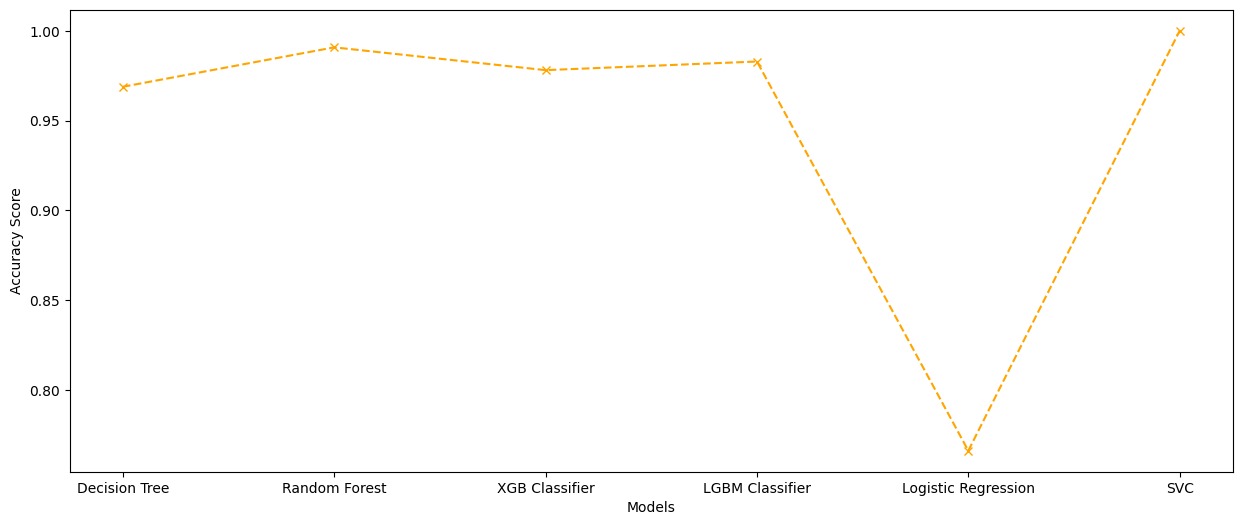

In [67]:
plt.figure(figsize = (15,6))

plt.plot(names, acc_score, marker = 'x', color = 'orange', linestyle = 'dashed')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.show()

## F1- Score

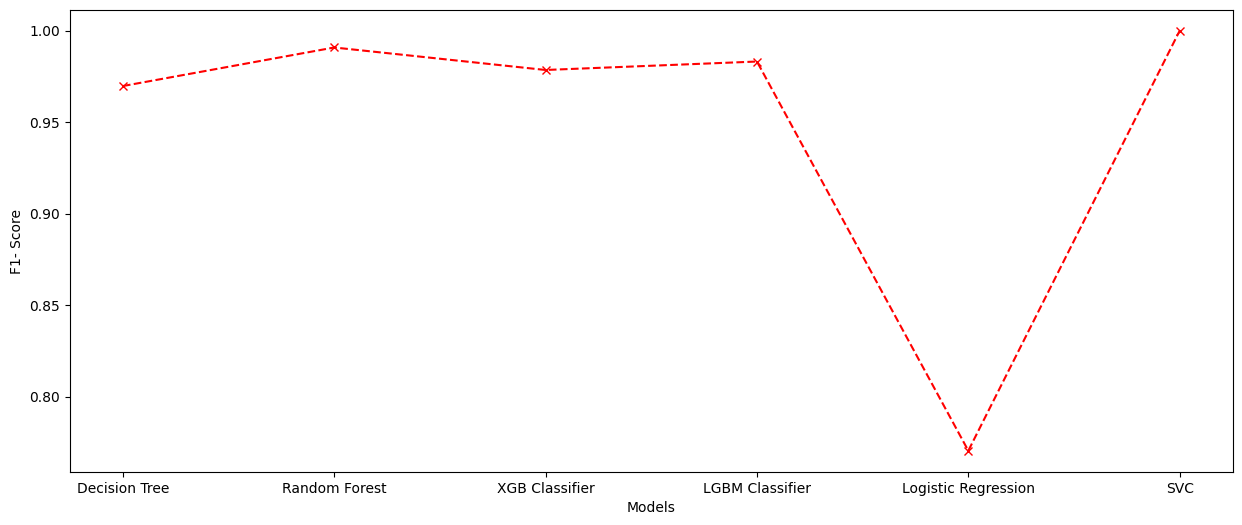

In [68]:
plt.figure(figsize = (15,6))

plt.plot(names, f1_score, marker = 'x', color = 'red', linestyle = 'dashed')
plt.xlabel('Models')
plt.ylabel('F1- Score')
plt.show()

## Precision Score

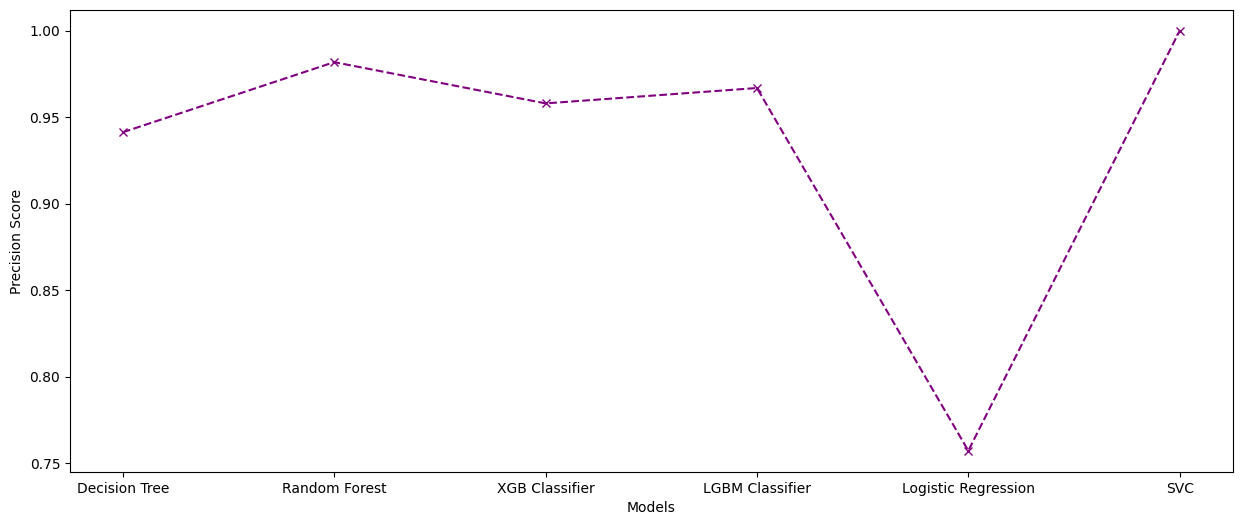

In [69]:
plt.figure(figsize = (15,6))

plt.plot(names, pre_score, marker = 'x', color = 'purple', linestyle = 'dashed')
plt.xlabel('Models')
plt.ylabel('Precision Score')
plt.show()

## Recall Score

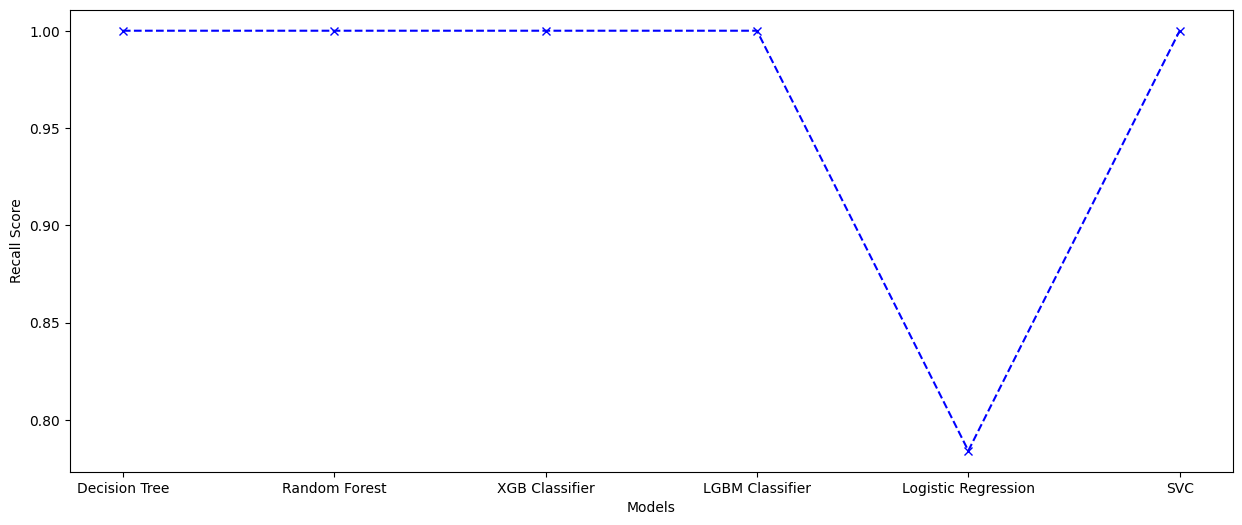

In [70]:
plt.figure(figsize = (15,6))

plt.plot(names, rec_score, marker = 'x', color = 'blue', linestyle = 'dashed')
plt.xlabel('Models')
plt.ylabel('Recall Score')
plt.show()

## ROC AUC Score

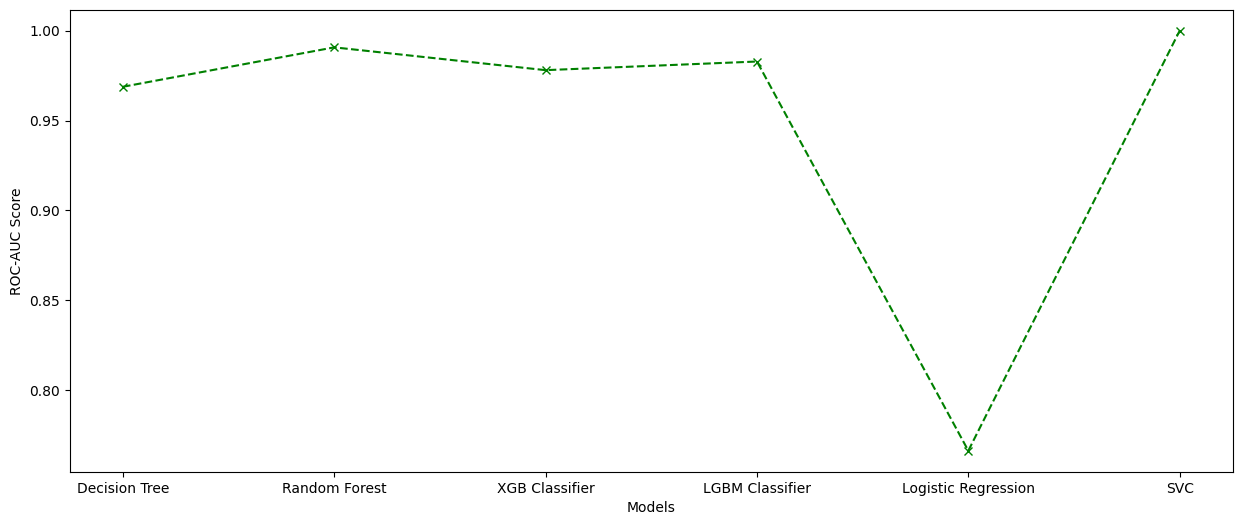

In [71]:
plt.figure(figsize = (15,6))

plt.plot(names, roc_score, marker = 'x', color = 'green', linestyle = 'dashed')
plt.xlabel('Models')
plt.ylabel('ROC-AUC Score')
plt.show()

# Exporting the Model

In [72]:
import pickle
pickle.dump(model8, open('RandomForest.pkl', 'wb'))

In [73]:
model8.predict([[1,51.0,	0,	0,	1,	2,	0,	166.29,	25.600000,	1	]])

array([0])